# Loading and Visualizing ALOS-2 data

## Load ALOS-2 data

You would first need to download and load the ALOS-2 data using a library like rasterio. Let's assume you have downloaded and preprocessed the ALOS-2 data as GeoTIFF files.

In [ ]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter
from skimage import filters

In [ ]:
# Load the ALOS-2 image
image_path = '/home/jovyan/shared/Arissara/ALOS-2/ALOS_2_180707-clipped.tif'
with rasterio.open(image_path) as src:
    image = src.read(1)  # Reading the first band (VH or VV)
    profile = src.profile
    transform = src.transform
    bounds = src.bounds

## Apply a Speckle Filter

You can apply a speckle filter (e.g., mean filter) to reduce noise in the radar image.

In [ ]:
from scipy import ndimage

In [ ]:
# Apply a focal mean filter to reduce speckle noise
def focal_mean(image, size=3):
    kernel = np.ones((size, size)) / (size * size)
    return ndimage.convolve(image, kernel, mode='reflect')

image_filtered = focal_mean(image, size=30)

## Visualizing Original and Filtered Images Side by Side

The provided code visualizes two images in a single figure using matplotlib. The plt.figure(figsize=(20, 10)) creates a figure of specific size. The plt.subplot(1, 2, 1) and plt.subplot(1, 2, 2) functions define two subplots for displaying images.

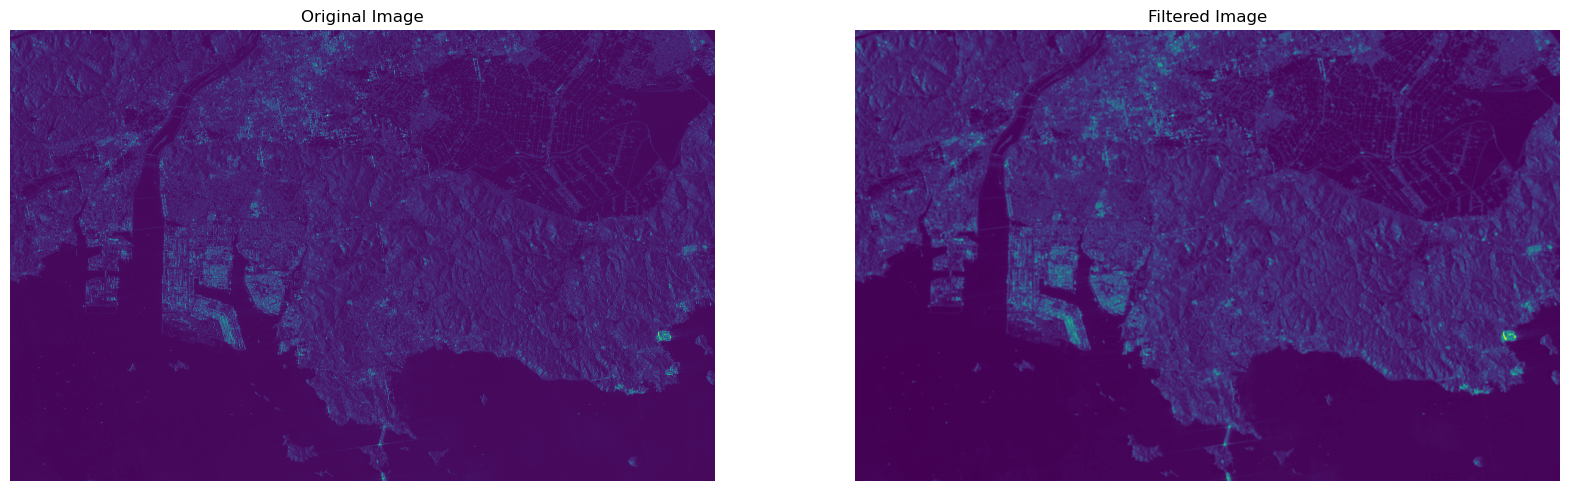

In [ ]:
# Visualize the images without transform
plt.figure(figsize=(20, 10))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the filtered image
plt.subplot(1, 2, 2)
plt.imshow(image_filtered)
plt.title('Filtered Image')
plt.axis('off')

plt.show()

## Computing and Visualizing Histogram with Statistical Annotations

This code computes the histogram of an image, showing the distribution of pixel intensities, and plots it using matplotlib. The histogram bins (hist) are computed along with the image's mean and variance. The plot is then annotated with red dashed lines for the mean and green dashed lines for ±1 standard deviation (SD), representing variance. Text labels indicate these values on the graph, and the figure includes titles, axis labels, and gridlines for better readability of pixel intensity distribution.

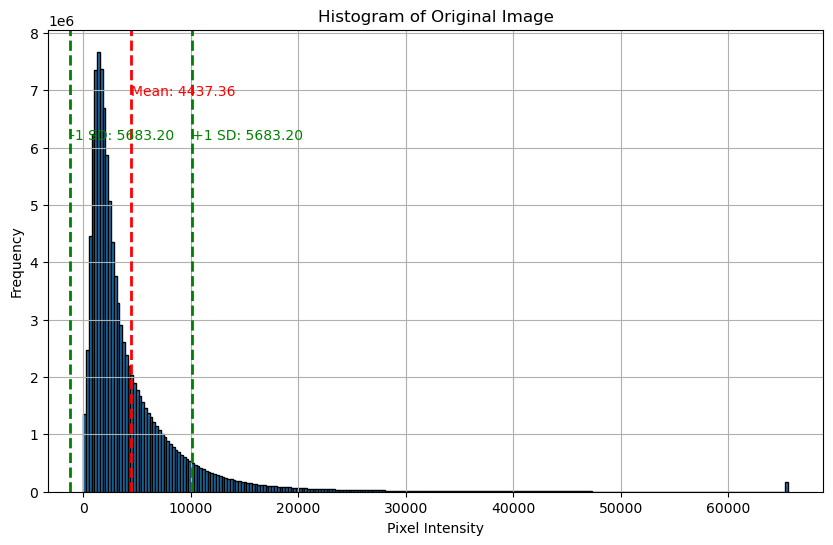

In [ ]:
# Compute the histogram
hist, bin_edges = np.histogram(image, bins=255)
mean_val = np.mean(image)
var_val = np.var(image)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

# Annotate the mean and variance on the plot
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_val, max(hist) * 0.9, f'Mean: {mean_val:.2f}', color='red')

plt.axvline(mean_val + np.sqrt(var_val), color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean_val - np.sqrt(var_val), color='green', linestyle='dashed', linewidth=2)
plt.text(mean_val + np.sqrt(var_val), max(hist) * 0.8, f'+1 SD: {np.sqrt(var_val):.2f}', color='green')
plt.text(mean_val - np.sqrt(var_val), max(hist) * 0.8, f'-1 SD: {np.sqrt(var_val):.2f}', color='green')

# Add titles and labels
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

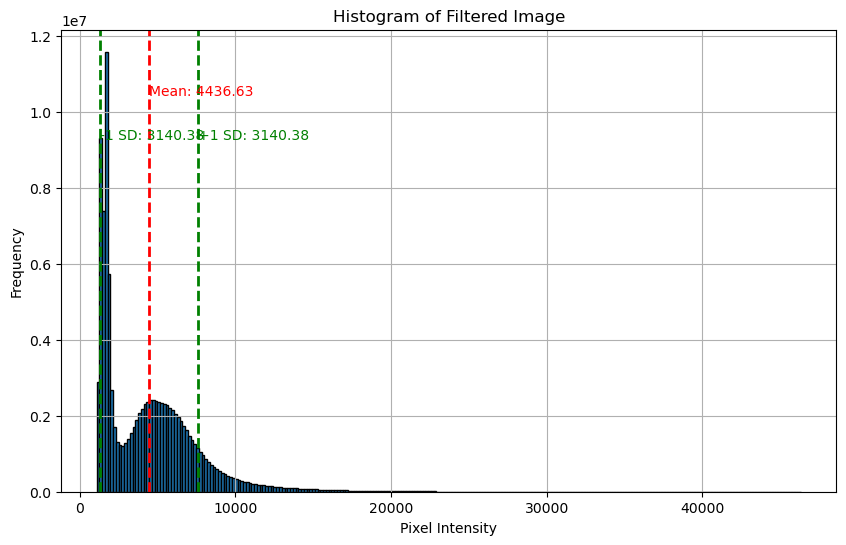

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

# Compute the histogram
hist, bin_edges = np.histogram(image_filtered, bins=255)
mean_val = np.mean(image_filtered)
var_val = np.var(image_filtered)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

# Annotate the mean and variance on the plot
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_val, max(hist) * 0.9, f'Mean: {mean_val:.2f}', color='red')

plt.axvline(mean_val + np.sqrt(var_val), color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean_val - np.sqrt(var_val), color='green', linestyle='dashed', linewidth=2)
plt.text(mean_val + np.sqrt(var_val), max(hist) * 0.8, f'+1 SD: {np.sqrt(var_val):.2f}', color='green')
plt.text(mean_val - np.sqrt(var_val), max(hist) * 0.8, f'-1 SD: {np.sqrt(var_val):.2f}', color='green')

# Add titles and labels
plt.title('Histogram of Filtered Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()